In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets

data_path = './data/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
cifar10.data[0].shape, type(cifar10).__mro__, cifar10.classes


((32, 32, 3),
 (torchvision.datasets.cifar.CIFAR10,
  torchvision.datasets.vision.VisionDataset,
  torch.utils.data.dataset.Dataset,
  typing.Generic,
  object),
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [3]:
img, label = cifar10[10]
class_names = cifar10.classes
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F40D2054E20>, 4, 'deer')

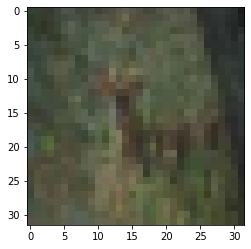

In [4]:
from matplotlib import pyplot as plt
plt.imshow(img)

In [5]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [6]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [7]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=transforms.ToTensor())

In [8]:
img_t, label = tensor_cifar10[0]
img_t, label, class_names[label], type(img_t), img_t.shape

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

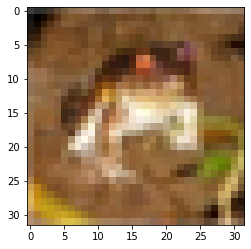

In [9]:
min, max = img_t.min(), img_t.max()
min, max

# height and width as the last two dimensions is correct 
# done automatically by ToTensor()
# which has also scaled the dataset

plt.imshow(img_t.permute(1,2,0))

In [10]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [11]:
channel_means = imgs.view(3, -1).mean(dim=1) # neat to compute mean over 3 dims
channel_stds = imgs.view(3, -1).std(dim=1)
channel_means, channel_stds

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [12]:
norm = transforms.Normalize(channel_means, channel_stds)

full_transform = transforms.Compose([
    transforms.ToTensor(),
    norm
])

transformed_cifar = datasets.CIFAR10(data_path, train=True, download=False,
                                     transform=full_transform)
transformed_cifar_val = datasets.CIFAR10(data_path, train=True, download=False,
                                     transform=full_transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


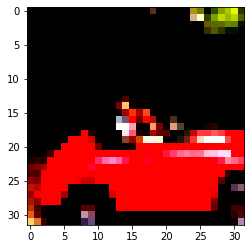

In [13]:
transformed_cifar[0]
plt.imshow(transformed_cifar[99][0].permute(1, 2, 0))
# black is where rgb levels go outside [0, 1] and so just rendered black by pyplot



In [14]:
label_map = {0: 0, 2: 1}
class_names = [cifar10.classes[i] for i in [0, 2]]
class_names

['airplane', 'bird']

In [15]:
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar
           if label in [0, 2]]

cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar_val
              if label in [0, 2]]

len(cifar2)

10000

In [16]:
len(cifar2_val)

10000

In [17]:
n_out = 2
shape = transformed_cifar[0][0].shape
n_in = shape[0] * shape[1] * shape[2]
model = nn.Sequential(
    nn.Linear(n_in, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)
shape

# note, we want here to use the negative log likelihood (NLLLoss)
# but it doesn't take as input probabilities, but a tensor of log probabilities
# we use nn.LogSoftmax which does the work to make it numerically stable

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


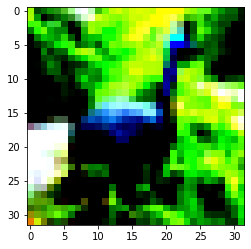

In [18]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [19]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0)) # need the batch variable as always

loss_fn = nn.NLLLoss()
loss = loss_fn(out, torch.tensor([label]))
loss, out

(tensor(0.9987, grad_fn=<NllLossBackward0>),
 tensor([[-0.4594, -0.9987]], grad_fn=<LogSoftmaxBackward0>))

In [20]:
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 1
for epoch in range(n_epochs):
    for img, label in cifar2[:12:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        print(out, loss)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch}, Loss: {float(loss)}')




tensor([[-0.4594, -0.9987]], grad_fn=<LogSoftmaxBackward0>) tensor(0.9987, grad_fn=<NllLossBackward0>)
tensor([[-0.2393, -1.5474]], grad_fn=<LogSoftmaxBackward0>) tensor(1.5474, grad_fn=<NllLossBackward0>)
tensor([[-0.1492, -1.9759]], grad_fn=<LogSoftmaxBackward0>) tensor(1.9759, grad_fn=<NllLossBackward0>)
tensor([[-3.8057, -0.0225]], grad_fn=<LogSoftmaxBackward0>) tensor(0.0225, grad_fn=<NllLossBackward0>)
tensor([[-0.2945, -1.3660]], grad_fn=<LogSoftmaxBackward0>) tensor(0.2945, grad_fn=<NllLossBackward0>)
tensor([[-0.5049, -0.9253]], grad_fn=<LogSoftmaxBackward0>) tensor(0.5049, grad_fn=<NllLossBackward0>)
tensor([[-3.3054, -0.0374]], grad_fn=<LogSoftmaxBackward0>) tensor(3.3054, grad_fn=<NllLossBackward0>)
tensor([[-4.2041e-03, -5.4738e+00]], grad_fn=<LogSoftmaxBackward0>) tensor(5.4738, grad_fn=<NllLossBackward0>)
tensor([[-1.0378, -0.4373]], grad_fn=<LogSoftmaxBackward0>) tensor(0.4373, grad_fn=<NllLossBackward0>)
tensor([[-0.0491, -3.0379]], grad_fn=<LogSoftmaxBackward0>) tenso

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


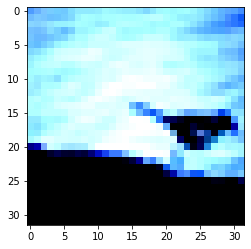

'bird'

In [21]:
last_im, last_lab = cifar2[-1]
plt.imshow(last_im.permute(1,2,0))
plt.show()
class_names[last_lab]

In [29]:
transformed_cifar = datasets.CIFAR10(data_path, train=True, download=False,
                                     transform=full_transform)
transformed_cifar_val = datasets.CIFAR10(data_path, train=False, download=False,
                                     transform=full_transform)

cifar2 = [(img, label_map[label]) for img, label in transformed_cifar
           if label in [0, 2]]

cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar_val
              if label in [0, 2]]


val_loader = torch.utils.data.DataLoader(
    cifar2_val, shuffle=True, batch_size = 64
)
train_loader = torch.utils.data.DataLoader(
    cifar2, shuffle=True, batch_size = 64
)



Epoch: 0, Loss: 109.00357818603516
Epoch: 1, Loss: 108.99586486816406
Epoch: 2, Loss: 108.99671173095703
Epoch: 3, Loss: 108.98919677734375
Epoch: 4, Loss: 108.99860382080078
Epoch: 5, Loss: 109.01142883300781
Epoch: 6, Loss: 108.99241638183594
Epoch: 7, Loss: 108.99455261230469
Epoch: 8, Loss: 108.99349975585938
Epoch: 9, Loss: 109.01036071777344
Epoch: 10, Loss: 108.99171447753906
Epoch: 11, Loss: 108.99595642089844
Epoch: 12, Loss: 109.00202941894531
Epoch: 13, Loss: 108.98483276367188
Epoch: 14, Loss: 108.99591827392578
Epoch: 15, Loss: 108.9888687133789
Epoch: 16, Loss: 108.99246215820312
Epoch: 17, Loss: 108.99421691894531
Epoch: 18, Loss: 109.01079559326172
Epoch: 19, Loss: 108.98760986328125
Epoch: 20, Loss: 109.01862335205078
Epoch: 21, Loss: 108.99422454833984
Epoch: 22, Loss: 109.01424407958984
Epoch: 23, Loss: 108.99829864501953
Epoch: 24, Loss: 108.99920654296875
Epoch: 25, Loss: 108.99054718017578
Epoch: 26, Loss: 108.99830627441406
Epoch: 27, Loss: 109.00749206542969
Epo

(157, 32)

In [33]:
model = nn.Sequential(
    nn.Linear(n_in, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)


Epoch: 0, Loss: 84.38871002197266
Epoch: 1, Loss: 76.0609359741211
Epoch: 2, Loss: 73.43901062011719
Epoch: 3, Loss: 71.5164794921875
Epoch: 4, Loss: 69.60853576660156
Epoch: 5, Loss: 68.7180404663086
Epoch: 6, Loss: 67.3148422241211
Epoch: 7, Loss: 65.95840454101562
Epoch: 8, Loss: 64.48552703857422
Epoch: 9, Loss: 63.88164520263672
Epoch: 10, Loss: 62.54171371459961
Epoch: 11, Loss: 61.446170806884766
Epoch: 12, Loss: 60.1953125
Epoch: 13, Loss: 58.9012336730957
Epoch: 14, Loss: 58.146724700927734
Epoch: 15, Loss: 57.18974304199219
Epoch: 16, Loss: 55.52460479736328
Epoch: 17, Loss: 55.16371536254883
Epoch: 18, Loss: 54.06528091430664
Epoch: 19, Loss: 52.81092834472656
Epoch: 20, Loss: 51.87251663208008
Epoch: 21, Loss: 49.07340621948242
Epoch: 22, Loss: 50.1500358581543
Epoch: 23, Loss: 47.339942932128906
Epoch: 24, Loss: 45.58823776245117
Epoch: 25, Loss: 44.784568786621094
Epoch: 26, Loss: 42.94601821899414
Epoch: 27, Loss: 41.960594177246094
Epoch: 28, Loss: 40.80424499511719
Epo

(157, 32)

In [34]:

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 50 
loss_fn = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    batch_loss = 0
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        batch_loss += loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch}, Loss: {float(batch_loss)}')


correct, total = 0, 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        huh, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print(f'Train Accuracy: {correct * 100/ total}%'), correct, total


t_correct, t_total = 0, 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        huh, predicted = torch.max(outputs, dim=1)
        t_total += labels.shape[0]
        t_correct += int((predicted == labels).sum())
        
print(f'Validation Accuracy: {t_correct * 100/ t_total}%'), t_correct, t_total

len(train_loader), len(val_loader)

Epoch: 0, Loss: 12.918100357055664
Epoch: 1, Loss: 15.225387573242188
Epoch: 2, Loss: 12.109886169433594
Epoch: 3, Loss: 7.4108452796936035
Epoch: 4, Loss: 11.20306396484375
Epoch: 5, Loss: 11.787881851196289
Epoch: 6, Loss: 5.823843479156494
Epoch: 7, Loss: 6.7023797035217285
Epoch: 8, Loss: 17.111068725585938
Epoch: 9, Loss: 4.682060241699219
Epoch: 10, Loss: 9.952017784118652
Epoch: 11, Loss: 3.8803508281707764
Epoch: 12, Loss: 5.321928977966309
Epoch: 13, Loss: 3.3652186393737793
Epoch: 14, Loss: 13.122331619262695
Epoch: 15, Loss: 4.3877387046813965
Epoch: 16, Loss: 7.369874000549316
Epoch: 17, Loss: 2.7749433517456055
Epoch: 18, Loss: 9.063002586364746
Epoch: 19, Loss: 2.7458572387695312
Epoch: 20, Loss: 2.0074310302734375
Epoch: 21, Loss: 9.737308502197266
Epoch: 22, Loss: 1.6874529123306274
Epoch: 23, Loss: 2.2829036712646484
Epoch: 24, Loss: 3.061102867126465
Epoch: 25, Loss: 1.318558692932129
Epoch: 26, Loss: 19.6806697845459
Epoch: 27, Loss: 5.739502906799316
Epoch: 28, Loss

(157, 32)

In [38]:
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]

numel_list_full = [p.numel()
                   for p in model.parameters()]
sum(numel_list), numel_list, sum(numel_list_full)

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2], 3737474)